In [101]:
import requests   # Importing requests to extract content from a url
import re 

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
!pip install tweepy

In [102]:
import pandas as pd
import tweepy 


In [103]:
#Twitter API credentials
consumer_key = "J2SG0K7CP8PlnqxfCC6X4qqYt"
consumer_secret = "BX0vPEOySfEY4kLaOBUHBHxLKj1njiUbhWzZMQTWj0OBifnbka"
access_key = "1146289980064632839-9NqGJVUSmFIv1neU3k6m5KcDTcmyKo"
access_secret = "GyoxlWMzXRquiKDwxbqaMRuIsD3oOn6F1B5zzVOS7izOp"

In [104]:
alltweets = []

In [105]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

I_srk = get_all_tweets("iamsrk")

...400 tweets downloaded so far
...599 tweets downloaded so far
...799 tweets downloaded so far
...999 tweets downloaded so far
...1199 tweets downloaded so far
...1399 tweets downloaded so far
...1599 tweets downloaded so far
...1799 tweets downloaded so far
...1999 tweets downloaded so far
...2199 tweets downloaded so far
...2399 tweets downloaded so far
...2599 tweets downloaded so far
...2799 tweets downloaded so far
...2999 tweets downloaded so far
...3199 tweets downloaded so far
...3199 tweets downloaded so far


In [106]:
I_srk

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2020-12-01 11:27:54,[],[],23279,None,1333734563130925062,en,None,2902,False,Twitter for iPhone,"“Today a reader, tomorrow a leader.” – Margare...",,Shah Rukh Khan,None,None
1,2020-11-25 22:21:03,[],[],69092,None,1331724606147682304,en,None,5001,False,Twitter for iPhone,Diego Maradona....you made football even more ...,,Shah Rukh Khan,None,None
2,2020-11-14 14:46:54,[],[],106400,None,1327624051381047297,en,None,6847,False,Twitter for iPhone,Happy Diwali to one and all... may the beauty ...,,Shah Rukh Khan,None,None
3,2020-11-08 12:08:46,[],"[{'screen_name': 'BrettLee_58', 'name': 'Brett...",10075,None,1325409927507058689,en,None,1779,False,Twitter for iPhone,@BrettLee_58 a very happy birthday to you my f...,,Shah Rukh Khan,None,None
4,2020-11-02 20:00:38,[],"[{'screen_name': 'mohamed_alabbar', 'name': 'M...",151031,None,1323354348307443714,en,None,13689,False,Twitter for iPhone,It’s nice to see myself on the biggest and tal...,,Shah Rukh Khan,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,2016-10-18 20:07:08,"[{'text': 'DearZindagiFirstLook', 'indices': [...",[],20741,None,788471495798337536,en,None,6454,False,Twitter for iPhone,Thank you for the love you have given the #Dea...,,Shah Rukh Khan,None,None
3195,2016-10-18 12:31:45,"[{'text': 'DearZindagiFirstLook', 'indices': [...","[{'screen_name': 'RedChilliesEnt', 'name': 'Re...",0,None,788356896776294400,en,None,4856,False,Twitter for iPhone,RT @RedChilliesEnt: Life is a ride and you got...,,Shah Rukh Khan,None,None
3196,2016-10-18 11:49:49,"[{'text': 'DearZindagi', 'indices': [104, 116]}]","[{'screen_name': 'aliaa08', 'name': 'Alia Bhat...",18876,None,788346344280690689,en,None,5878,False,Twitter for iPhone,This @aliaa08 has no sense of timing. But I ha...,,Shah Rukh Khan,None,None
3197,2016-10-18 04:13:02,[],"[{'screen_name': 'AnushkaSharma', 'name': 'Anu...",7556,None,788231387816009728,en,None,2899,False,Tweetbot for iΟS,@AnushkaSharma wrapped the schedule of film a...,,Shah Rukh Khan,None,None


In [107]:
# Writing reviews into text file 
with open("twitter_srk.txt","w",encoding="utf-8") as snp:
    snp.write(str(I_srk))

In [108]:
 # Joinining all the twitter srk reviews into single paragraph 
ip_rev_string = " ".join(I_srk)

In [109]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [110]:
# words that contained in twitter srk 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [97]:
ip_reviews_words

['time',
 'hashtags',
 'user',
 'mentions',
 'favorite',
 'count',
 'geo',
 'id',
 'str',
 'lang',
 'place',
 'retweet',
 'count',
 'retweeted',
 'source',
 'text',
 'location',
 'name',
 'time',
 'zone',
 'utc',
 'offset']

In [111]:
stop_words = stopwords.words('english')

with open("E:/Ravi_ExcelR_Assignments/Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

In [112]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [113]:
ip_reviews_words

['time',
 'hashtags',
 'user',
 'mentions',
 'favorite',
 'count',
 'geo',
 'id',
 'str',
 'lang',
 'place',
 'retweet',
 'count',
 'retweeted',
 'source',
 'text',
 'location',
 'time',
 'zone',
 'utc',
 'offset']

In [114]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [77]:
ip_rev_string

'time hashtags user mentions favorite count geo id str lang place retweet count retweeted source text location time zone utc offset'

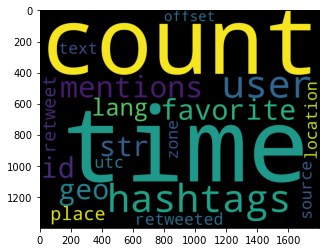

In [115]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [116]:
# positive words # Choose the path for +ve words stored in system
with open("E:/Ravi_ExcelR_Assignments/Text Mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]

In [117]:
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [118]:
# negative words  Choose path for -ve words stored in system
with open("E:/Ravi_ExcelR_Assignments/Text Mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]

In [119]:
negwords

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [125]:
# negative word cloud : below code signifies that there is no negative words

In [121]:
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [124]:
#which actually shows there is no negative words

In [122]:
# Positive word cloud

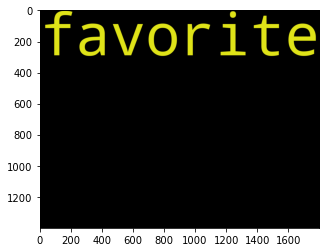

In [123]:
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)